In [2]:
import pandas as pd
import numpy as np
import feather
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import gc

In [2]:
event_file = './events.csv'
event_types = {'event_value':np.float32}
events = pd.read_csv(event_file, dtype=event_types).drop('app_id', axis=1)

In [3]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111946597 entries, 0 to 111946596
Data columns (total 5 columns):
session_id         int64
event              object
event_timestamp    int64
event_value        float32
user_id_hash       object
dtypes: float32(1), int64(2), object(2)
memory usage: 3.8+ GB


# Events

In [3]:
events['event_timestamp'] = pd.to_datetime(events['event_timestamp']/1e3, unit = 's')

In [4]:
events['weekofday'] = events['event_timestamp'].dt.weekday
events['event_timestamp'] = events['event_timestamp'].dt.hour
events['event_timestamp'] = events['event_timestamp'].astype(np.int8)
events['weekofday'] = events['weekofdayr'].astype(np.int8)

In [13]:
events['session_id'].nunique()

5009421

In [14]:
events['event_value'].nunique()

57

In [15]:
events['event'].nunique()

109

In [2]:
event_file = './events_updated.csv'
event_types = {'event_value':np.float32, 'weekofday': np.int8, 'event_timestamp': np.int8}
events = pd.read_csv(event_file, dtype=event_types).drop('Unnamed: 0', axis = 1)

In [11]:
events.drop('Unnamed: 0', axis = 1, inplace = True)

In [3]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111946597 entries, 0 to 111946596
Data columns (total 6 columns):
session_id         int64
event              object
event_timestamp    int8
event_value        float32
user_id_hash       object
weekofday          int8
dtypes: float32(1), int64(1), int8(2), object(2)
memory usage: 3.1+ GB


In [4]:
events.head()

,session_id,event,event_timestamp,event_value,user_id_hash,weekofday
0,5558845121177764917,45,17,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...,2
1,5558845121177764917,45,17,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...,2
2,7689508378645584666,.m5100869650219008,2,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...,4
3,2201961907282901522,4,1,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...,6
4,2201961907282901522,6,1,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...,6


In [21]:
# plots
weekday = events['weekofday'].value_counts().reset_index()
# plt.bar(events['weekofday'], events.groupby('weekofday').count().reset_index())
# plt.xlabel('weekofday')
# plt.ylabel('count')
# plt.title('Weekofday count')

Text(0.5,1,'Weekofday count')

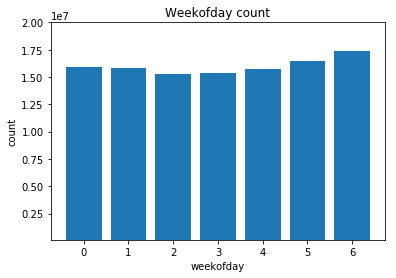

In [26]:
plt.bar(weekday['index'], weekday['weekofday'])
plt.ylim(100000, 20000000)
plt.xlabel('weekofday')
plt.ylabel('count')
plt.title('Weekofday count')

From the above we can see that the total events are uniformly distributed accross alll the days of the week

In [30]:
weekday = events[events['event']=='8'][['event_timestamp', 'weekofday']]

In [32]:
purchase_hour = weekday['event_timestamp'].value_counts().reset_index()
weekday = weekday['weekofday'].value_counts().reset_index()


Text(0.5,1,'count of purchases by hour')

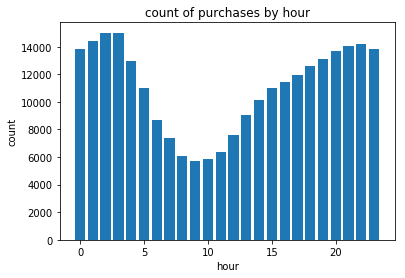

In [35]:
# purchase on weekodfday
plt.bar(purchase_hour['index'], purchase_hour['event_timestamp'])
plt.xlabel('hour')
plt.ylabel('count')
plt.title('count of purchases by hour')

Text(0.5,1,'count of purchases by weekofday')

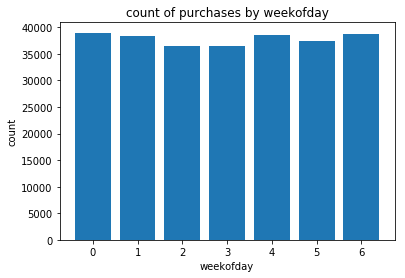

In [34]:
#puchase on hour of day
plt.bar(weekday['index'], weekday['weekofday'])
plt.xlabel('weekofday')
plt.ylabel('count')
plt.title('count of purchases by weekofday')

Looks like there is more activity of purchase during the early and the late hours of the day. The purchase counts are lower during 600 to 1500 hour. However, the amount of purchase on different week of days remain almost similar.

## Session

In [5]:
session = './sessions.csv'
session_types = {'event_value':np.float32}
sessions = pd.read_csv(session, dtype=session_types).drop(['app_id', 'is_mau','is_wau', 
                                                          'user_id_hash', 'latitude', 
                                                          'longitude'], axis=1)

In [7]:
sessions.head()

,session_id,start_timestamp,timezone,timezone_offset,previous_sessions_duration,user_created_timestamp,is_user_first_session,is_session,is_developer,country,region,city,locale,os_name,session_index,device_id
0,5558845121177764917,1542215364580,Asia/Manila,28800000.0,25837591,1538874289458,False,True,False,PH,00,makati,en_GB,Android OS,30,546a3d98-d540-4e72-ad82-9ebd64e0839b
1,2201961907282901522,1543712977293,Asia/Manila,28800000.0,35050130,1538874289458,False,True,False,PH,00,quezon city,en_GB,Android OS,47,546a3d98-d540-4e72-ad82-9ebd64e0839b
2,18781111175537580,1539215568666,Asia/Manila,28800000.0,11343848,1538874289458,False,True,False,PH,00,makati,en_GB,Android OS,10,546a3d98-d540-4e72-ad82-9ebd64e0839b
3,1477540082628742048,1540120743010,Asia/Manila,28800000.0,13499724,1538874289458,False,True,False,PH,11,davao city,en_GB,Android OS,13,546a3d98-d540-4e72-ad82-9ebd64e0839b
4,8184875317380844086,1542671625528,Asia/Manila,28800000.0,32788010,1538874289458,False,True,False,PH,00,makati,en_GB,Android OS,41,546a3d98-d540-4e72-ad82-9ebd64e0839b


In [5]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6239836 entries, 0 to 6239835
Data columns (total 22 columns):
app_id                        int64
session_id                    int64
start_timestamp               int64
timezone                      object
timezone_offset               float64
previous_sessions_duration    int64
user_created_timestamp        int64
is_user_first_session         bool
is_session                    bool
is_developer                  bool
is_wau                        bool
is_mau                        bool
country                       object
region                        object
city                          object
latitude                      float64
longitude                     float64
locale                        object
os_name                       object
session_index                 int64
device_id                     object
user_id_hash                  object
dtypes: bool(5), float64(3), int64(6), object(8)
memory usage: 839.1+ MB


In [6]:
session.timezone.unique()

array(['Asia/Manila', 'Europe/London', 'America/New_York', 'Asia/Kolkata',
       'Australia/Sydney', 'America/Phoenix', 'America/Los_Angeles',
       'Europe/Lisbon', 'America/Chicago', 'Asia/Katmandu',
       'America/Port_of_Spain', 'Europe/Oslo', 'Europe/Warsaw',
       'America/Denver', 'Asia/Kuala_Lumpur', 'Asia/Karachi',
       'Asia/Bangkok', 'America/Detroit', 'Europe/Paris', 'Asia/Jakarta',
       'Australia/Brisbane', 'Asia/Calcutta', 'Asia/Makassar',
       'Europe/Stockholm', 'America/Jamaica', 'Europe/Berlin',
       'Australia/Hobart', 'Pacific/Honolulu',
       'America/Indiana/Indianapolis', 'America/Toronto', 'Europe/Tirane',
       'Europe/Rome', 'Africa/Nairobi', 'US/Pacific',
       'America/Argentina/Cordoba', 'Europe/Helsinki', 'Europe/Belgrade',
       'Asia/Dhaka', 'Asia/Ulaanbaatar', 'Asia/Colombo', 'Africa/Harare',
       'Europe/Madrid', 'Indian/Mauritius', 'Atlantic/Reykjavik',
       'America/Mexico_City', 'Africa/Johannesburg', 'America/Santiago',
       

In [7]:
session.timezone.nunique()

455

In [8]:
session.columns

Index(['app_id', 'session_id', 'start_timestamp', 'timezone',
       'timezone_offset', 'previous_sessions_duration',
       'user_created_timestamp', 'is_user_first_session', 'is_session',
       'is_developer', 'is_wau', 'is_mau', 'country', 'region', 'city',
       'latitude', 'longitude', 'locale', 'os_name', 'session_index',
       'device_id', 'user_id_hash'],
      dtype='object')

In [4]:
event_file = './events_updated.csv'
event_types = {'event_value':np.float32, 'weekofday': np.int8, 'event_timestamp': np.int8}
events = pd.read_csv(event_file, dtype=event_types).drop(['Unnamed: 0', 'user_id_hash'], axis = 1)

In [10]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111946597 entries, 0 to 111946596
Data columns (total 5 columns):
session_id         int64
event              object
event_timestamp    int8
event_value        float32
weekofday          int8
dtypes: float32(1), int64(1), int8(2), object(1)
memory usage: 2.3+ GB


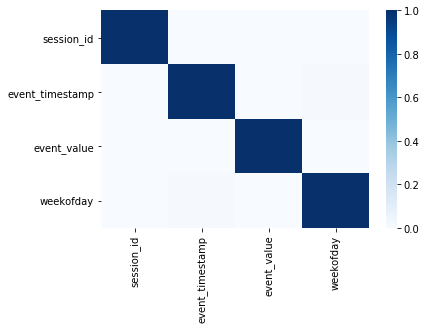

In [21]:
sns.heatmap(events.corr(), 
        xticklabels=events.corr().columns,
        yticklabels=events.corr().columns,
           cmap="Blues",
           fmt='d')

In [20]:
sessions = sessions[sessions['is_developer'] != True]
sessions = sessions[sessions['is_session'] == True]
sessions.drop(['is_session', 'is_developer'], axis = 1, inplace = True)

In [21]:
sessions.head()

,session_id,start_timestamp,timezone,timezone_offset,previous_sessions_duration,user_created_timestamp,is_user_first_session,country,region,city,locale,os_name,session_index,device_id
0,5558845121177764917,1542215364580,Asia/Manila,28800000.0,25837591,1538874289458,False,PH,00,makati,en_GB,Android OS,30,546a3d98-d540-4e72-ad82-9ebd64e0839b
1,2201961907282901522,1543712977293,Asia/Manila,28800000.0,35050130,1538874289458,False,PH,00,quezon city,en_GB,Android OS,47,546a3d98-d540-4e72-ad82-9ebd64e0839b
2,18781111175537580,1539215568666,Asia/Manila,28800000.0,11343848,1538874289458,False,PH,00,makati,en_GB,Android OS,10,546a3d98-d540-4e72-ad82-9ebd64e0839b
3,1477540082628742048,1540120743010,Asia/Manila,28800000.0,13499724,1538874289458,False,PH,11,davao city,en_GB,Android OS,13,546a3d98-d540-4e72-ad82-9ebd64e0839b
4,8184875317380844086,1542671625528,Asia/Manila,28800000.0,32788010,1538874289458,False,PH,00,makati,en_GB,Android OS,41,546a3d98-d540-4e72-ad82-9ebd64e0839b


In [22]:
for i in sessions.columns:
    print(i, sessions[i].nunique())

session_id 5165730
start_timestamp 5163281
timezone 454
timezone_offset 40
previous_sessions_duration 4137765
user_created_timestamp 619750
is_user_first_session 2
country 228
region 755
city 31540
locale 1760
os_name 3
session_index 1404
device_id 612318


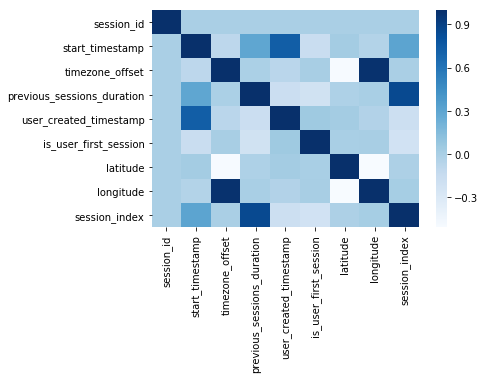

In [19]:
sns.heatmap(session.corr(), 
        xticklabels=session.corr().columns,
        yticklabels=session.corr().columns,
           cmap="Blues",
           fmt='d')

In [ ]:
events = pd.merge(events, session, on='session_id', how='outer')

In [23]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165760 entries, 0 to 6239835
Data columns (total 14 columns):
session_id                    int64
start_timestamp               int64
timezone                      object
timezone_offset               float64
previous_sessions_duration    int64
user_created_timestamp        int64
is_user_first_session         bool
country                       object
region                        object
city                          object
locale                        object
os_name                       object
session_index                 int64
device_id                     object
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 556.7+ MB


In [24]:
sessions.to_csv('session_updates')

In [3]:
sessions = pd.read_csv('session_updates')

In [5]:
# events = pd.merge(events, sessions, on='session_id', how='outer')

In [7]:
sessions.drop('start_timestamp', axis = 1, inplace = True)

In [10]:
sessions.drop('Unnamed: 0', axis = 1, inplace = True)
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165760 entries, 0 to 5165759
Data columns (total 13 columns):
session_id                    int64
timezone                      object
timezone_offset               float64
previous_sessions_duration    int64
user_created_timestamp        int64
is_user_first_session         bool
country                       object
region                        object
city                          object
locale                        object
os_name                       object
session_index                 int64
device_id                     object
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 477.9+ MB


In [11]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111946597 entries, 0 to 111946596
Data columns (total 5 columns):
session_id         int64
event              object
event_timestamp    int8
event_value        float32
weekofday          int8
dtypes: float32(1), int64(1), int8(2), object(1)
memory usage: 2.3+ GB


Text(0.5,1,'count of os_name')

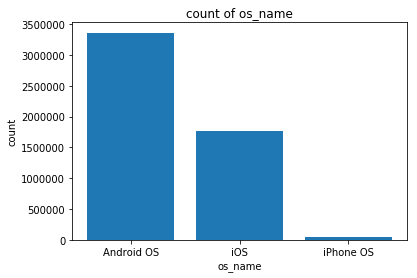

In [13]:
# count on os_name

plt.bar(sessions['os_name'].value_counts().reset_index()['index'], 
        sessions['os_name'].value_counts().reset_index()['os_name'])
plt.xlabel('os_name')
plt.ylabel('count')
plt.title('count of os_name')

Text(0.5,1,'count of is_user_first_session')

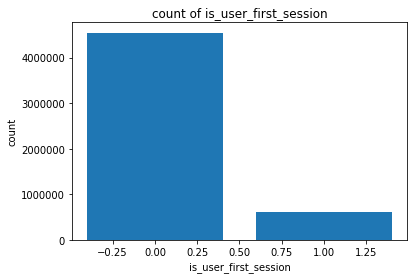

In [14]:
# count on is_user_first_session

plt.bar(sessions['is_user_first_session'].value_counts().reset_index()['index'], 
        sessions['is_user_first_session'].value_counts().reset_index()['is_user_first_session'])
plt.xlabel('is_user_first_session')
plt.ylabel('count')
plt.title('count of is_user_first_session')

Text(0.5,1,'count of activity by country')

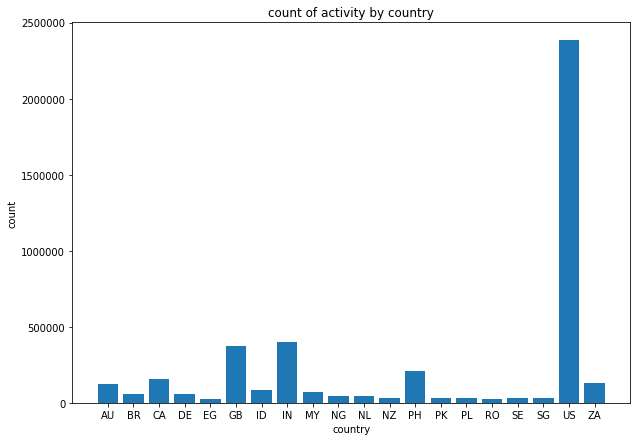

In [34]:
# count on is_user_first_session
country = sessions['country'].value_counts().reset_index().sort_values('country', ascending = False).head(20)
plt.figure(figsize=(10, 7))
plt.bar(country['index'], 
        country['country'])
plt.xlabel('country')
plt.ylabel('count')
plt.title('count of activity by country')

In [32]:
sessions['country'].value_counts().reset_index().sort_values('country', ascending = False)

,index,country
0,US,2382588
1,IN,401404
2,GB,373924
3,PH,207779
4,CA,158324
5,ZA,127091
6,AU,125672
7,ID,86715
8,MY,72076
9,DE,59438


Text(0.5,1,'count of activity by city')

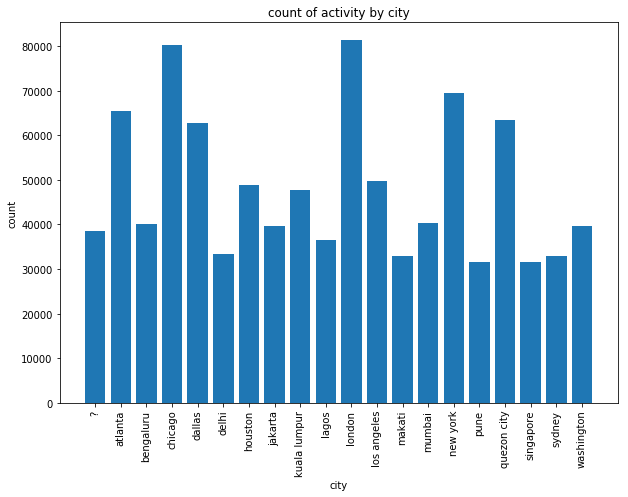

In [37]:
# count on city
country = sessions['city'].value_counts().reset_index().sort_values('city', ascending = False).head(20)
plt.figure(figsize=(10, 7))
plt.bar(country['index'], 
        country['city'])
plt.xlabel('city')
plt.ylabel('count')
plt.xticks(rotation = 'vertical')
plt.title('count of activity by city')

Text(0.5,1,'count of activity by region')

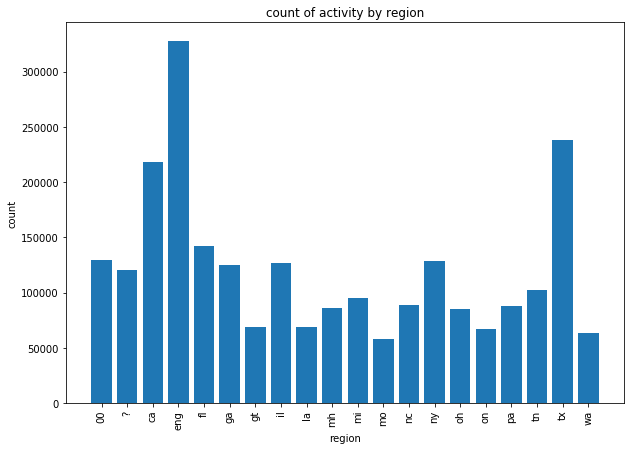

In [38]:
# count on region
country = sessions['region'].value_counts().reset_index().sort_values('region', ascending = False).head(20)
plt.figure(figsize=(10, 7))
plt.bar(country['index'], 
        country['region'])
plt.xlabel('region')
plt.ylabel('count')
plt.xticks(rotation = 'vertical')
plt.title('count of activity by region')

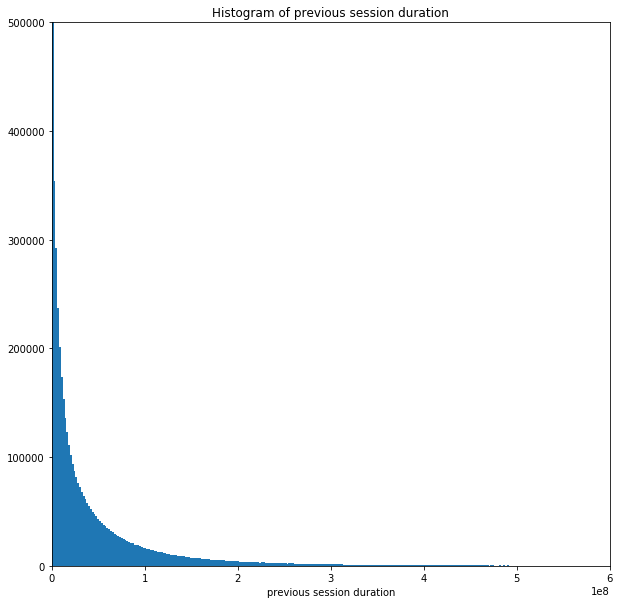

In [60]:
plt.figure(figsize = (10, 10))
plt.hist(sessions['previous_sessions_duration'], bins = 1000)
plt.xlim(0,  600000000)
plt.ylim(0, 500000)
plt.xlabel('previous session duration')
plt.title('Histogram of previous session duration')
plt.show()

In [40]:
sessions['session_id'].value_counts().reset_index().sort_values('session_id', ascending = False).head(20)

,index,session_id
0,7208061843659492523,2
16,8572234697293544146,2
1,1473875631441362891,2
29,2622564282768928608,2
28,7323745982301710432,2
27,8323524134761828126,2
26,8018288981612137545,2
25,2164818626238472519,2
23,2834835040365721544,2
22,7649941570236019552,2


Text(0.5,1,'count of activity by timezone')

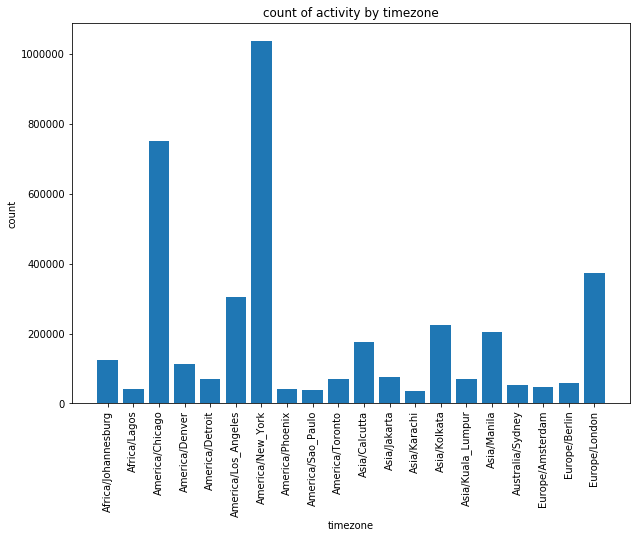

In [62]:
# count on timezone
country = sessions['timezone'].value_counts().reset_index().sort_values('timezone', ascending = False).head(20)
plt.figure(figsize=(10, 7))
plt.bar(country['index'], 
        country['timezone'])
plt.xlabel('timezone')
plt.ylabel('count')
plt.xticks(rotation = 'vertical')
plt.title('count of activity by timezone')